In [420]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [421]:
df_CO2_Emission = pd.read_csv('CO2 Emissions_Canada.csv')
df_CO2_Emission

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


DATA Prepation

In [422]:
df_CO2_Emission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [423]:
df_CO2_Emission.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [424]:
df_CO2_Emission.drop_duplicates(inplace=True)

In [425]:
df_CO2_Emission.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000
mean,3.161812,5.618911,12.610220,9.070583,11.017876,27.411016,251.157752
std,1.365201,1.846250,3.553066,2.278884,2.946876,7.245318,59.290426
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.700000,10.300000,12.700000,32.000000,289.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [426]:
df_CO2_Emission_wait = pd.DataFrame()
df_CO2_Emission_check = pd.DataFrame()
columns_cont = []
for i in df_CO2_Emission.columns:
    temp = i
    if df_CO2_Emission[i].dtypes == 'object' or i == 'CO2 Emissions(g/km)':
        df_CO2_Emission_wait[temp] = df_CO2_Emission[i]
    else:
        columns_cont.append(i)
        df_CO2_Emission_check[temp] = df_CO2_Emission[i]


In [427]:
df_CO2_Emission_check

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
0,2.0,4,9.9,6.7,8.5,33
1,2.4,4,11.2,7.7,9.6,29
2,1.5,4,6.0,5.8,5.9,48
3,3.5,6,12.7,9.1,11.1,25
4,3.5,6,12.1,8.7,10.6,27
...,...,...,...,...,...,...
7380,2.0,4,10.7,7.7,9.4,30
7381,2.0,4,11.2,8.3,9.9,29
7382,2.0,4,11.7,8.6,10.3,27
7383,2.0,4,11.2,8.3,9.9,29


In [428]:
df_CO2_Emission_wait

,Make,Model,Vehicle Class,Transmission,Fuel Type,CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,AS5,Z,196
1,ACURA,ILX,COMPACT,M6,Z,221
2,ACURA,ILX HYBRID,COMPACT,AV7,Z,136
3,ACURA,MDX 4WD,SUV - SMALL,AS6,Z,255
4,ACURA,RDX AWD,SUV - SMALL,AS6,Z,244
...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,AS8,Z,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,AS8,Z,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,AS8,Z,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,AS8,Z,232


In [429]:
df_CO2_Emission_wait.reset_index(inplace=True)
df_CO2_Emission_wait.drop(columns='index',inplace=True)
df_CO2_Emission_wait

,Make,Model,Vehicle Class,Transmission,Fuel Type,CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,AS5,Z,196
1,ACURA,ILX,COMPACT,M6,Z,221
2,ACURA,ILX HYBRID,COMPACT,AV7,Z,136
3,ACURA,MDX 4WD,SUV - SMALL,AS6,Z,255
4,ACURA,RDX AWD,SUV - SMALL,AS6,Z,244
...,...,...,...,...,...,...
6277,VOLVO,XC40 T5 AWD,SUV - SMALL,AS8,Z,219
6278,VOLVO,XC60 T5 AWD,SUV - SMALL,AS8,Z,232
6279,VOLVO,XC60 T6 AWD,SUV - SMALL,AS8,Z,240
6280,VOLVO,XC90 T5 AWD,SUV - STANDARD,AS8,Z,232


In [430]:
scale = preprocessing.StandardScaler()
df_CO2_Emission_check = pd.DataFrame(scale.fit_transform(df_CO2_Emission_check),columns = columns_cont)

In [431]:
df_CO2_Emission_check

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
0,-0.851086,-0.876934,-0.762844,-1.040321,-0.854490,0.771454
1,-0.558066,-0.876934,-0.396934,-0.601475,-0.481184,0.219329
2,-1.217362,-0.876934,-1.860575,-1.435283,-1.736851,2.841921
3,0.247740,0.206429,0.025270,0.012910,0.027870,-0.332795
4,0.247740,0.206429,-0.143611,-0.162629,-0.141815,-0.056733
...,...,...,...,...,...,...
6277,-0.851086,-0.876934,-0.537668,-0.601475,-0.549058,0.357361
6278,-0.851086,-0.876934,-0.396934,-0.338167,-0.379373,0.219329
6279,-0.851086,-0.876934,-0.256199,-0.206513,-0.243625,-0.056733
6280,-0.851086,-0.876934,-0.396934,-0.338167,-0.379373,0.219329


In [432]:
df_CO2_Emission_wait

,Make,Model,Vehicle Class,Transmission,Fuel Type,CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,AS5,Z,196
1,ACURA,ILX,COMPACT,M6,Z,221
2,ACURA,ILX HYBRID,COMPACT,AV7,Z,136
3,ACURA,MDX 4WD,SUV - SMALL,AS6,Z,255
4,ACURA,RDX AWD,SUV - SMALL,AS6,Z,244
...,...,...,...,...,...,...
6277,VOLVO,XC40 T5 AWD,SUV - SMALL,AS8,Z,219
6278,VOLVO,XC60 T5 AWD,SUV - SMALL,AS8,Z,232
6279,VOLVO,XC60 T6 AWD,SUV - SMALL,AS8,Z,240
6280,VOLVO,XC90 T5 AWD,SUV - STANDARD,AS8,Z,232


{'whiskers': [<matplotlib.lines.Line2D at 0x1cb583cdf00>,
 'caps': [<matplotlib.lines.Line2D at 0x1cb583ce440>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cb583cdc60>,
 'medians': [<matplotlib.lines.Line2D at 0x1cb583ce860>,
 'fliers': [<matplotlib.lines.Line2D at 0x1cb583ceb00>,
 'means': []}

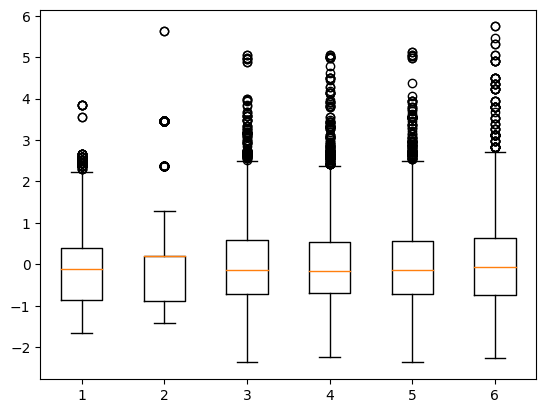

In [433]:
fig,ax = plt.subplots()
ax.boxplot(df_CO2_Emission_check)

In [434]:
def remove_outlier(df_in,col_name_x):
    q1_x = df_in[col_name_x].quantile(0.25)
    q3_x = df_in[col_name_x].quantile(0.75)
    iqr_x = q3_x-q1_x #Interquartile range
    fence_low_x  = q1_x-1.5*iqr_x
    fence_high_x = q3_x+1.5*iqr_x
    df_out = df_in.loc[((df_in[col_name_x] > fence_low_x) & (df_in[col_name_x] < fence_high_x))]
    return df_out


In [435]:
for i in df_CO2_Emission_check.columns:
    df_CO2_Emission_check = remove_outlier(df_CO2_Emission_check,i)

{'whiskers': [<matplotlib.lines.Line2D at 0x1cb58475d20>,
 'caps': [<matplotlib.lines.Line2D at 0x1cb58476260>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cb58475a80>,
 'medians': [<matplotlib.lines.Line2D at 0x1cb584767a0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1cb58476a40>,
 'means': []}

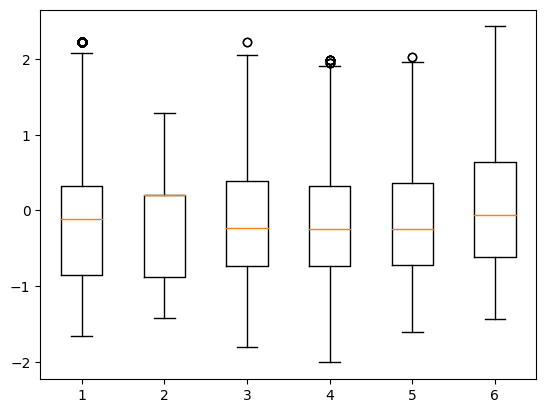

In [436]:
fig,ax = plt.subplots()
ax.boxplot(df_CO2_Emission_check)

In [437]:
df_CO2_Emission_check

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
0,-0.851086,-0.876934,-0.762844,-1.040321,-0.854490,0.771454
1,-0.558066,-0.876934,-0.396934,-0.601475,-0.481184,0.219329
3,0.247740,0.206429,0.025270,0.012910,0.027870,-0.332795
4,0.247740,0.206429,-0.143611,-0.162629,-0.141815,-0.056733
5,0.247740,0.206429,-0.199905,-0.601475,-0.345436,0.081298
...,...,...,...,...,...,...
6277,-0.851086,-0.876934,-0.537668,-0.601475,-0.549058,0.357361
6278,-0.851086,-0.876934,-0.396934,-0.338167,-0.379373,0.219329
6279,-0.851086,-0.876934,-0.256199,-0.206513,-0.243625,-0.056733
6280,-0.851086,-0.876934,-0.396934,-0.338167,-0.379373,0.219329


In [438]:
df_CO2_Emission_ver_2 = pd.concat([df_CO2_Emission_wait,df_CO2_Emission_check], axis=1)

In [439]:
df_CO2_Emission_ver_2

,Make,Model,Vehicle Class,Transmission,Fuel Type,CO2 Emissions(g/km),Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
0,ACURA,ILX,COMPACT,AS5,Z,196,-0.851086,-0.876934,-0.762844,-1.040321,-0.854490,0.771454
1,ACURA,ILX,COMPACT,M6,Z,221,-0.558066,-0.876934,-0.396934,-0.601475,-0.481184,0.219329
2,ACURA,ILX HYBRID,COMPACT,AV7,Z,136,NaN,NaN,NaN,NaN,NaN,NaN
3,ACURA,MDX 4WD,SUV - SMALL,AS6,Z,255,0.247740,0.206429,0.025270,0.012910,0.027870,-0.332795
4,ACURA,RDX AWD,SUV - SMALL,AS6,Z,244,0.247740,0.206429,-0.143611,-0.162629,-0.141815,-0.056733
...,...,...,...,...,...,...,...,...,...,...,...,...
6277,VOLVO,XC40 T5 AWD,SUV - SMALL,AS8,Z,219,-0.851086,-0.876934,-0.537668,-0.601475,-0.549058,0.357361
6278,VOLVO,XC60 T5 AWD,SUV - SMALL,AS8,Z,232,-0.851086,-0.876934,-0.396934,-0.338167,-0.379373,0.219329
6279,VOLVO,XC60 T6 AWD,SUV - SMALL,AS8,Z,240,-0.851086,-0.876934,-0.256199,-0.206513,-0.243625,-0.056733
6280,VOLVO,XC90 T5 AWD,SUV - STANDARD,AS8,Z,232,-0.851086,-0.876934,-0.396934,-0.338167,-0.379373,0.219329


In [440]:
df_CO2_Emission_ver_2.dropna(inplace=True)

In [441]:
df_CO2_Emission_ver_2.reset_index(inplace=True)
df_CO2_Emission_ver_2.drop(columns='index',inplace=True)

In [442]:
df_CO2_Emission_ver_2

,Make,Model,Vehicle Class,Transmission,Fuel Type,CO2 Emissions(g/km),Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
0,ACURA,ILX,COMPACT,AS5,Z,196,-0.851086,-0.876934,-0.762844,-1.040321,-0.854490,0.771454
1,ACURA,ILX,COMPACT,M6,Z,221,-0.558066,-0.876934,-0.396934,-0.601475,-0.481184,0.219329
2,ACURA,MDX 4WD,SUV - SMALL,AS6,Z,255,0.247740,0.206429,0.025270,0.012910,0.027870,-0.332795
3,ACURA,RDX AWD,SUV - SMALL,AS6,Z,244,0.247740,0.206429,-0.143611,-0.162629,-0.141815,-0.056733
4,ACURA,RLX,MID-SIZE,AS6,Z,230,0.247740,0.206429,-0.199905,-0.601475,-0.345436,0.081298
...,...,...,...,...,...,...,...,...,...,...,...,...
5668,VOLVO,XC40 T5 AWD,SUV - SMALL,AS8,Z,219,-0.851086,-0.876934,-0.537668,-0.601475,-0.549058,0.357361
5669,VOLVO,XC60 T5 AWD,SUV - SMALL,AS8,Z,232,-0.851086,-0.876934,-0.396934,-0.338167,-0.379373,0.219329
5670,VOLVO,XC60 T6 AWD,SUV - SMALL,AS8,Z,240,-0.851086,-0.876934,-0.256199,-0.206513,-0.243625,-0.056733
5671,VOLVO,XC90 T5 AWD,SUV - STANDARD,AS8,Z,232,-0.851086,-0.876934,-0.396934,-0.338167,-0.379373,0.219329


In [443]:
df_CO2_Emission_ver_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5673 entries, 0 to 5672
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              5673 non-null   object 
 1   Model                             5673 non-null   object 
 2   Vehicle Class                     5673 non-null   object 
 3   Transmission                      5673 non-null   object 
 4   Fuel Type                         5673 non-null   object 
 5   CO2 Emissions(g/km)               5673 non-null   int64  
 6   Engine Size(L)                    5673 non-null   float64
 7   Cylinders                         5673 non-null   float64
 8   Fuel Consumption City (L/100 km)  5673 non-null   float64
 9   Fuel Consumption Hwy (L/100 km)   5673 non-null   float64
 10  Fuel Consumption Comb (L/100 km)  5673 non-null   float64
 11  Fuel Consumption Comb (mpg)       5673 non-null   float64
dtypes: flo

In [444]:
Y = df_CO2_Emission_ver_2['CO2 Emissions(g/km)']
df_CO2_Emission_ver_2.drop(columns='CO2 Emissions(g/km)',inplace=True)
Y

0       196
1       221
2       255
3       244
4       230
       ... 
5668    219
5669    232
5670    240
5671    232
5672    248
Name: CO2 Emissions(g/km), Length: 5673, dtype: int64

In [445]:
df_CO2_Emission_cont = pd.DataFrame()
df_CO2_Emission_cate = pd.DataFrame()
columns_cont = []
for i in df_CO2_Emission.columns:
    temp = i
    if df_CO2_Emission[i].dtypes == 'object' :
        df_CO2_Emission_cate[temp] = df_CO2_Emission[i]
    else:
        columns_cont.append(i)
        df_CO2_Emission_cont[temp] = df_CO2_Emission[i]